<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

Regressão Logística serve para classificarmos algo dentro de um conjunto de categorias. No exemplo à seguir, utilizaremos um *dataset* de pacientes com doenças cardiovasculares, e através da regressão logística iremos classificar pacientes propensos à terem doença cardíaca. Neste caso a regressão linear não é adequada, uma vez que necessita de valores contínuos para realizar qualquer tipo de previsão. 

A Regressão Logística, diferente da Regressão Linear trabalha com probabilidades, sendo assim, após termos o modelo treinado, será possível descobrir qual a probabilidade de determinado paciente possuir algum tipo de problema cardíaco. 

<p align=center><img src="https://ciksiti.com/f/7453cfcd4573e53f70b7734c05699fbb.png" width="50%"></p>

A imagem acima representa a função *Sigmóide*, imagine no gráfico que o `eixo-x` nos mostrasse a idade de determinado paciente, e o `eixo-y` a probabilidade deste paciente possuir alguma doença cardíaca. É necessário mapear valores para dentro de um range de $[0,1]$. A função *Sigmóide* é matemáticamente expressada através da fórmula:

$$
sigmoid(z) = \frac{1}{1 + e^{-z}}
$$

onde $z= b + w_1x_1 + w_2x_2 + \dots + w_mx_m$ é o *output* da camada linear de um modelo de regressão logística. A curva *sigmoidal* tem a função de mapear esse valor para o intervalo entre 0 e 1. 

Da mesma forma que na Regressão Logística tínhamos o erro quadrático (Squared Loss), aqui também temos uma *Loss Function* representada através da fórmula:

$$
\text{Log Loss} = \sum_{(x, y) \in D} -y\log(\hat{y}) - (1 -y)\log(1-\hat{y})
$$

# Regressão Logística com `Scikit-Learn`

O *dataset* original foi coletado da ***Cleveland Clinic Foundation*** e se encontra no [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease).

Para fins de estudos utilizaremos um arquivo `csv` com os dados préviamente tratados que se econtra [neste link](http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=0).

A variável alvo (*target*) a ser utilizada apresenta duas categorias:
* `num` - Diagnóstico de doença cardíaca (diagnóstico angiográfico)

  * 0 - Não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1 - Há doença cardíaca ( > 50% do estreitamento do diâmetro)

In [9]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurando seaborn
sns.set_style()

# importando arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# conferindo dimensões do dataframe
print("Tamanho do df: {}\n".format(df.shape))

df.head()

Tamanho do df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
# importando scikit-learn para criação do modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Agora vamos separar nosso *dataset* entre treino e teste.

In [13]:
# 1. escolher e importar o modelo 
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hiperparametros
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treino)
model.fit(X_train, y_train)

# 5. Fazer previsões com os novos dados
X_test = scaler.transform(X_test)   #padronizando dados de teste
y_pred = model.predict(X_test)

In [24]:
X_train[1]

array([ 0.5413694 ,  0.65396709, -2.2279138 ,  1.68740374,  0.55696769,
       -0.4197211 ,  0.99124748, -1.07490458, -0.72352604, -0.94153576,
       -0.97309926, -0.72883849, -0.90448995])


Como podemos ver acima, o resultado dos dados foram padrozinados atraves do método `StandardScaler()`.

In [15]:
# imprimindo relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        36
           1       0.96      0.65      0.78        40

    accuracy                           0.80        76
   macro avg       0.84      0.81      0.80        76
weighted avg       0.85      0.80      0.80        76



Vamos agora plotar a Matriz de confusão para podermos visualizar o desempenho por classes. 

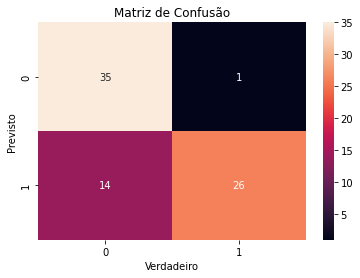

In [25]:
# criando figura
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_xlabel("Verdadeiro")
ax.set_ylabel("Previsto")

plt.show()